# Rangkuman Chapter 5: Support Vector Machines

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 5 dengan implementasi Python untuk Support Vector Machines (SVMs), termasuk Linear SVM, Kernel Trick, dan SVM Regression.

## 1. Pengenalan Support Vector Machines

**Support Vector Machine (SVM)** adalah powerful dan versatile ML model yang capable untuk:
- **Linear classification**
- **Nonlinear classification**
- **Regression**
- **Outlier detection**

### Karakteristik:
- Salah satu model paling populer dalam ML
- Particularly suited untuk complex small/medium-sized datasets
- Foundation penting dalam ML toolbox

### Konsep Dasar:
SVM mencoba fit **widest possible street** (margin) antara classes, yang disebut **large margin classification**.

## 2. Linear SVM Classification

### 2.1 Large Margin Classification

**Ide fundamental**: Decision boundary tidak hanya memisahkan classes, tapi juga stays **as far away as possible** dari closest training instances.

**Support Vectors**: Instances located on the edge of the street yang determine decision boundary.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

print("=== Iris Dataset ===")
print(f"Features: Petal length, Petal width")
print(f"Target: 1 if Iris virginica, 0 otherwise")
print(f"Samples: {len(X)}")

=== Iris Dataset ===
Features: Petal length, Petal width
Target: 1 if Iris virginica, 0 otherwise
Samples: 150


### 2.2 Soft Margin Classification

**Hard margin classification**: 
- Semua instances harus off the street dan on the right side
- Problems: Hanya works jika data linearly separable, sensitive to outliers

**Soft margin classification**:
- More flexible model
- Balance antara keeping street large dan limiting margin violations
- Controlled by hyperparameter **C**

In [3]:
# Train Linear SVM dengan C=1
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X, y)

print("=== Linear SVM Classifier ===")
print("Model trained dengan soft margin (C=1)")
print("\nNote: Feature scaling sangat penting untuk SVM!")

=== Linear SVM Classifier ===
Model trained dengan soft margin (C=1)

Note: Feature scaling sangat penting untuk SVM!


In [4]:
# Make prediction
prediction = svm_clf.predict([[5.5, 1.7]])

print(f"\n=== Prediction ===")
print(f"Input: Petal length=5.5cm, width=1.7cm")
print(f"Prediction: {prediction[0]}")
print(f"Class: {'Iris virginica' if prediction[0] == 1 else 'Not Iris virginica'}")
print("\nNote: Unlike Logistic Regression, SVM tidak output probabilities")


=== Prediction ===
Input: Petal length=5.5cm, width=1.7cm
Prediction: 1.0
Class: Iris virginica

Note: Unlike Logistic Regression, SVM tidak output probabilities


C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


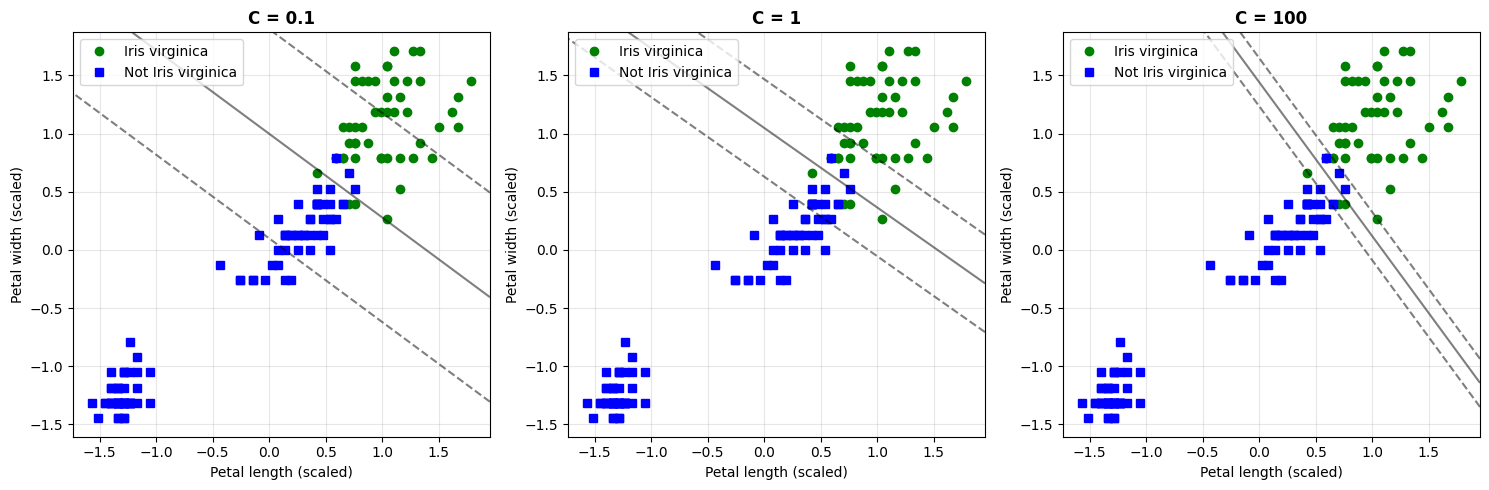


Observasi:
- C kecil (0.1): Large margin, more margin violations (regularization kuat)
- C sedang (1): Balanced
- C besar (100): Fewer margin violations, smaller margin (less regularization)

Jika model overfitting: REDUCE C


In [5]:
# Visualisasi decision boundary dengan berbagai C values
def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w = svm_clf.named_steps["linear_svc"].coef_[0]
    b = svm_clf.named_steps["linear_svc"].intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="Decision boundary")
    plt.plot(x0, gutter_up, "k--", linewidth=2, label="Margin")
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Compare C values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C_values = [0.1, 1, 100]
plt.figure(figsize=(15, 5))

for idx, C in enumerate(C_values, 1):
    svm_clf = LinearSVC(C=C, loss="hinge", random_state=42)
    svm_clf.fit(X_scaled, y)
    
    plt.subplot(1, 3, idx)
    plt.plot(X_scaled[y==1, 0], X_scaled[y==1, 1], "go", label="Iris virginica")
    plt.plot(X_scaled[y==0, 0], X_scaled[y==0, 1], "bs", label="Not Iris virginica")
    
    # Plot decision boundary (simplified)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    plt.xlabel("Petal length (scaled)")
    plt.ylabel("Petal width (scaled)")
    plt.title(f"C = {C}", fontweight='bold')
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- C kecil (0.1): Large margin, more margin violations (regularization kuat)")
print("- C sedang (1): Balanced")
print("- C besar (100): Fewer margin violations, smaller margin (less regularization)")
print("\nJika model overfitting: REDUCE C")

### 2.3 Alternatif SVM Classes

Scikit-Learn menyediakan beberapa SVM classes:

1. **LinearSVC**: 
   - Based on liblinear
   - Fast, scales linearly
   - No kernel trick
   - Good untuk large datasets

2. **SVC(kernel="linear")**:
   - Based on libsvm
   - Supports kernel trick
   - Slower untuk large datasets

3. **SGDClassifier(loss="hinge")**:
   - Stochastic Gradient Descent
   - Online learning
   - Out-of-core training

## 3. Nonlinear SVM Classification

### 3.1 Polynomial Features Approach

Untuk nonlinear datasets, tambahkan polynomial features untuk make dataset linearly separable.

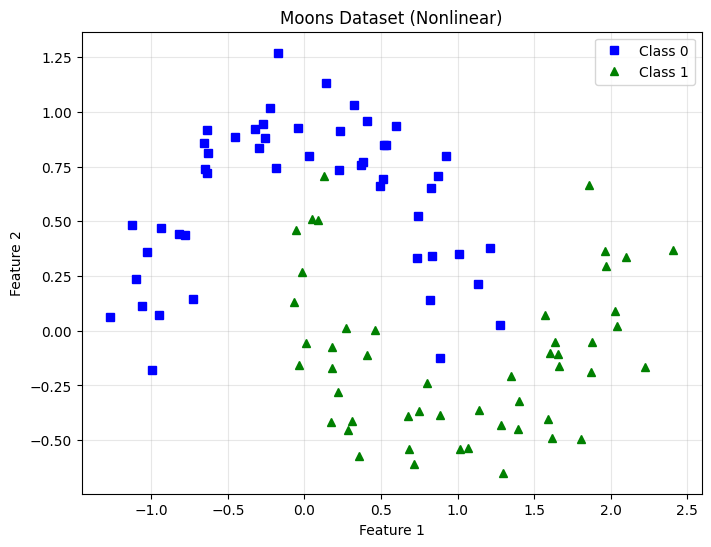

Dataset ini TIDAK linearly separable!


In [6]:
# Generate moons dataset (nonlinear)
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "bs", label="Class 0")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "g^", label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset (Nonlinear)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Dataset ini TIDAK linearly separable!")

In [7]:
# SVM dengan Polynomial Features
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X_moons, y_moons)

print("=== Polynomial SVM ===")
print("Pipeline: PolynomialFeatures(degree=3) → StandardScaler → LinearSVC")
print("\nDengan polynomial features, dataset menjadi linearly separable!")

=== Polynomial SVM ===
Pipeline: PolynomialFeatures(degree=3) → StandardScaler → LinearSVC

Dengan polynomial features, dataset menjadi linearly separable!


C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 3.2 Polynomial Kernel

**Kernel Trick**: Mathematical technique untuk get same result sebagai polynomial features **tanpa actually adding them**.

**Advantages**:
- No combinatorial explosion of features
- Much more computationally efficient
- Can use very high-degree polynomials

**Polynomial Kernel**: \\( K(a, b) = (\gamma a^T b + r)^d \\)

In [8]:
# SVM dengan Polynomial Kernel
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X_moons, y_moons)

print("=== Polynomial Kernel SVM ===")
print("Kernel: polynomial")
print("Degree: 3")
print("coef0 (r): 1")
print("C: 5")
print("\nSama hasilnya dengan polynomial features tapi JAUH lebih efficient!")

=== Polynomial Kernel SVM ===
Kernel: polynomial
Degree: 3
coef0 (r): 1
C: 5

Sama hasilnya dengan polynomial features tapi JAUH lebih efficient!


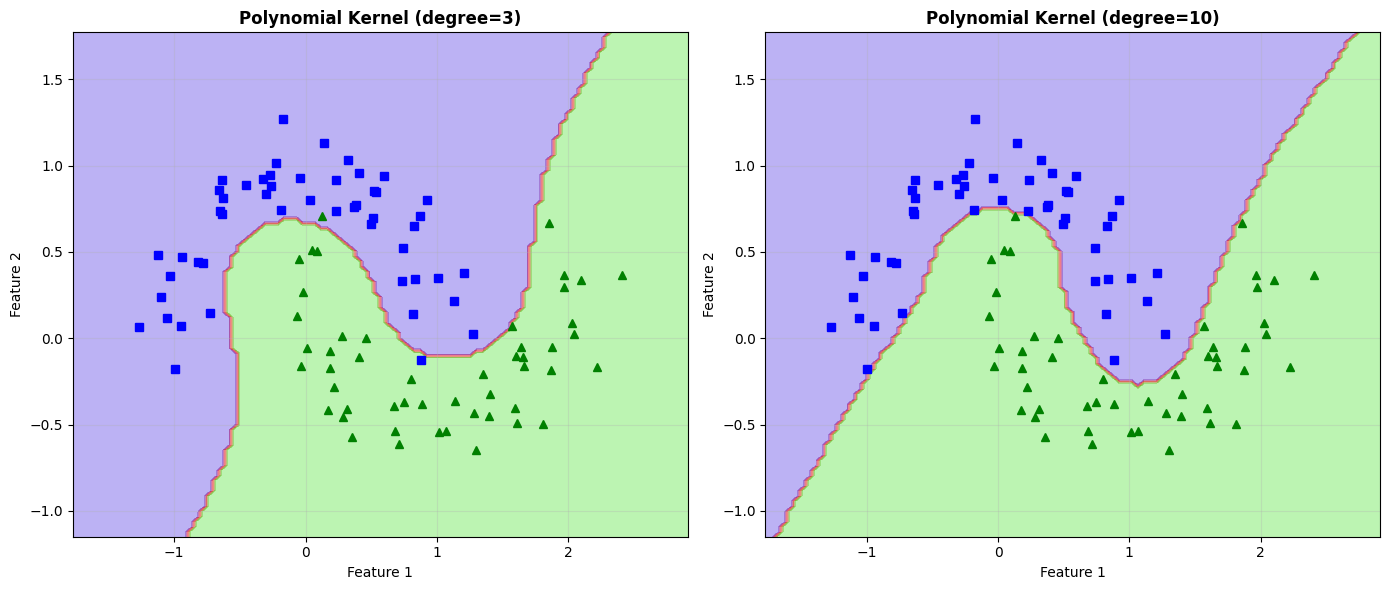


Observasi:
- Degree 3: Good fit
- Degree 10: More complex decision boundary

If overfitting: REDUCE degree
If underfitting: INCREASE degree


In [9]:
# Compare polynomial degrees
degrees = [3, 10]
plt.figure(figsize=(14, 6))

for idx, degree in enumerate(degrees, 1):
    poly_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=1, C=5))
    ])
    poly_svm.fit(X_moons, y_moons)
    
    plt.subplot(1, 2, idx)
    
    # Plot decision boundary
    x0s = np.linspace(X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5, 100)
    x1s = np.linspace(X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = poly_svm.predict(X_grid).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)
    plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "bs")
    plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "g^")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Polynomial Kernel (degree={degree})", fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Degree 3: Good fit")
print("- Degree 10: More complex decision boundary")
print("\nIf overfitting: REDUCE degree")
print("If underfitting: INCREASE degree")

### 3.3 Gaussian RBF Kernel

**Gaussian Radial Basis Function (RBF)**: 

\\[ K(a, b) = \exp(-\gamma \|a - b\|^2) \\]

**Similarity function** yang measures how much each instance resembles a landmark.

**Key hyperparameter γ (gamma)**:
- **Large γ**: Narrow bell curve, small range of influence → irregular boundary
- **Small γ**: Wide bell curve, large range of influence → smoother boundary
- Acts like **regularization**: γ too high = overfitting, γ too low = underfitting

In [10]:
# SVM dengan RBF Kernel
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X_moons, y_moons)

print("=== RBF Kernel SVM ===")
print("Kernel: rbf (Gaussian)")
print("gamma (γ): 5")
print("C: 0.001")
print("\nRBF kernel works well untuk most cases!")

=== RBF Kernel SVM ===
Kernel: rbf (Gaussian)
gamma (γ): 5
C: 0.001

RBF kernel works well untuk most cases!


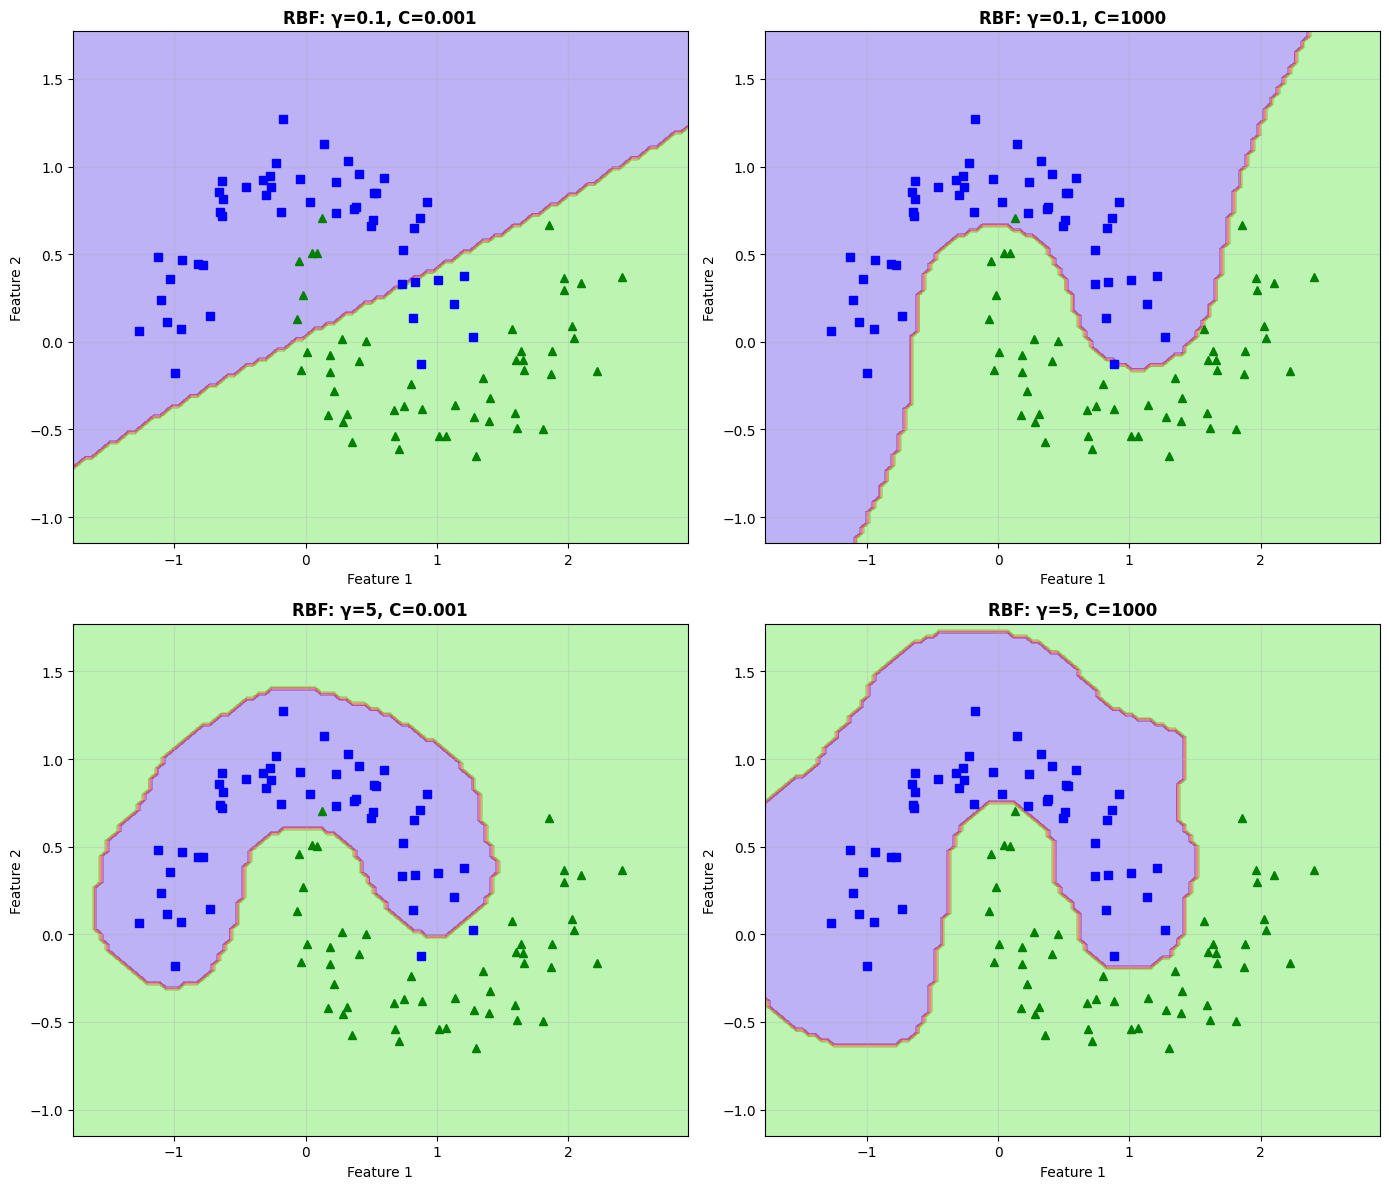


Observasi:
- Bottom-left (γ=0.1, C=0.001): Smooth, might underfit
- Bottom-right (γ=0.1, C=1000): Still smooth, less regularization
- Top-left (γ=5, C=0.001): More irregular, strong regularization
- Top-right (γ=5, C=1000): Very irregular, might overfit

If overfitting: REDUCE γ or REDUCE C
If underfitting: INCREASE γ or INCREASE C


In [11]:
# Visualisasi RBF kernel dengan berbagai gamma dan C
gamma_values = [0.1, 5]
C_values = [0.001, 1000]

plt.figure(figsize=(14, 12))

plot_idx = 1
for gamma in gamma_values:
    for C in C_values:
        rbf_svm = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
        rbf_svm.fit(X_moons, y_moons)
        
        plt.subplot(2, 2, plot_idx)
        
        # Plot decision boundary
        x0s = np.linspace(X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5, 100)
        x1s = np.linspace(X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5, 100)
        x0, x1 = np.meshgrid(x0s, x1s)
        X_grid = np.c_[x0.ravel(), x1.ravel()]
        y_pred = rbf_svm.predict(X_grid).reshape(x0.shape)
        
        plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)
        plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "bs")
        plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "g^")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"RBF: γ={gamma}, C={C}", fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plot_idx += 1

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Bottom-left (γ=0.1, C=0.001): Smooth, might underfit")
print("- Bottom-right (γ=0.1, C=1000): Still smooth, less regularization")
print("- Top-left (γ=5, C=0.001): More irregular, strong regularization")
print("- Top-right (γ=5, C=1000): Very irregular, might overfit")
print("\nIf overfitting: REDUCE γ or REDUCE C")
print("If underfitting: INCREASE γ or INCREASE C")

### 3.4 Kernel Selection Guidelines

**Rule of thumb**:

1. **Always try linear kernel first** (LinearSVC)
   - Much faster than SVC(kernel="linear")
   - Especially jika training set very large atau banyak features

2. **Try Gaussian RBF kernel** jika training set tidak terlalu large
   - Works well dalam most cases

3. **Experiment dengan kernels lain** jika ada spare time:
   - Polynomial kernel
   - Specialized kernels (string kernels, dll)
   - Use cross-validation dan grid search

### Common Kernels:

- **Linear**: \\( K(a, b) = a^T b \\)
- **Polynomial**: \\( K(a, b) = (\gamma a^T b + r)^d \\)
- **Gaussian RBF**: \\( K(a, b) = \exp(-\gamma \|a - b\|^2) \\)
- **Sigmoid**: \\( K(a, b) = \tanh(\gamma a^T b + r) \\)

## 4. Computational Complexity

### Comparison of SVM Classes:

| Class | Time Complexity | Out-of-core | Scaling Required | Kernel Trick |
|-------|----------------|-------------|------------------|-------------|
| **LinearSVC** | O(m × n) | No | Yes | No |
| **SGDClassifier** | O(m × n) | Yes | Yes | No |
| **SVC** | O(m² × n) to O(m³ × n) | No | Yes | Yes |

### Notes:
- **LinearSVC**: Based on liblinear, scales almost linearly
- **SVC**: Based on libsvm, supports kernel trick tapi slow untuk large datasets
- **SGDClassifier**: Online learning, good untuk huge datasets

## 5. SVM Regression

SVM juga support **regression** tasks!

**Reverse objective**: Instead of fitting largest street while limiting violations, SVM Regression tries to **fit as many instances as possible ON the street** while limiting violations.

**ε-insensitive**: Adding instances within margin tidak affect predictions.

Width of the street controlled by hyperparameter **ε (epsilon)**.

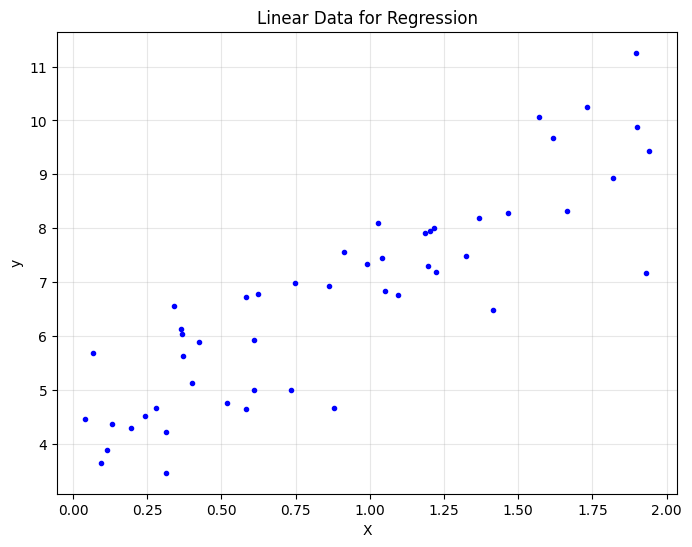

Dataset untuk SVM Regression


In [12]:
# Generate random linear data
np.random.seed(42)
m = 50
X_reg = 2 * np.random.rand(m, 1)
y_reg = 4 + 3 * X_reg + np.random.randn(m, 1)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.plot(X_reg, y_reg, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Data for Regression")
plt.grid(True, alpha=0.3)
plt.show()

print("Dataset untuk SVM Regression")

In [13]:
# Linear SVM Regression
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_reg, y_reg.ravel())

print("=== Linear SVM Regression ===")
print(f"epsilon (ε): 1.5")
print("\nModel tries to fit as many instances as possible within the street")

=== Linear SVM Regression ===
epsilon (ε): 1.5

Model tries to fit as many instances as possible within the street


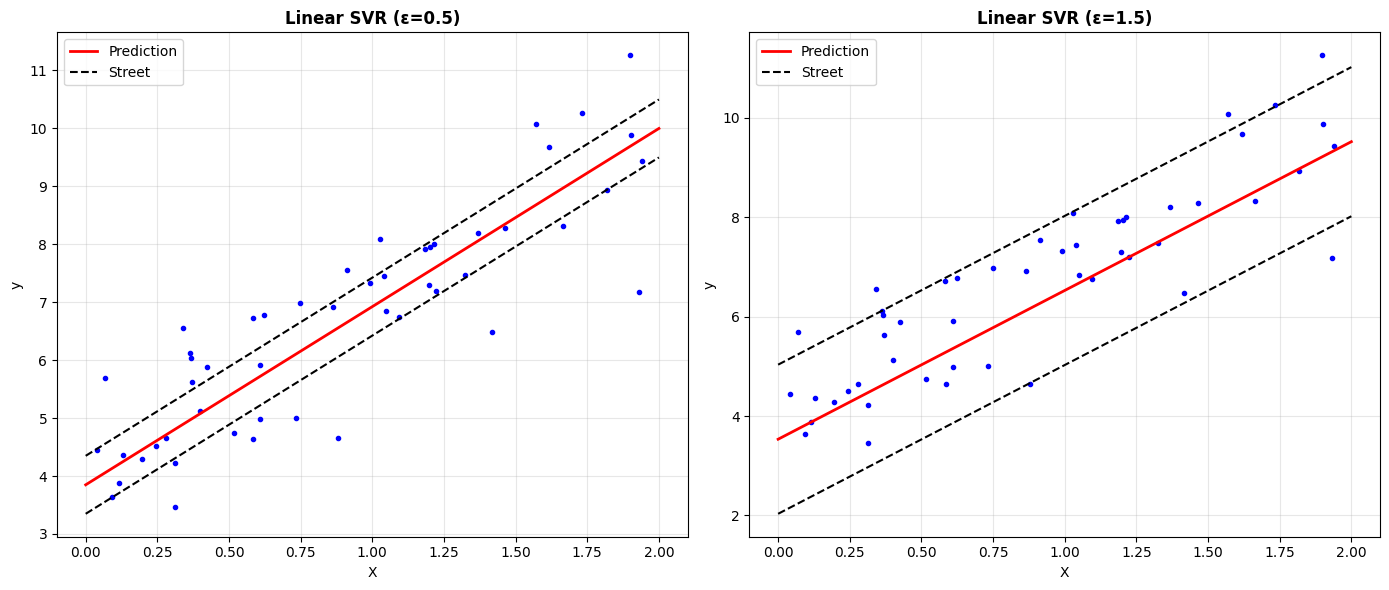


Observasi:
- ε=0.5: Narrow street, more sensitive to training data
- ε=1.5: Wide street, more instances fit within margin


In [14]:
# Compare epsilon values
epsilons = [0.5, 1.5]
plt.figure(figsize=(14, 6))

for idx, epsilon in enumerate(epsilons, 1):
    svm_reg = LinearSVR(epsilon=epsilon, random_state=42)
    svm_reg.fit(X_reg, y_reg.ravel())
    
    X_new = np.linspace(0, 2, 100).reshape(-1, 1)
    y_pred = svm_reg.predict(X_new)
    
    plt.subplot(1, 2, idx)
    plt.plot(X_reg, y_reg, "b.")
    plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction")
    plt.plot(X_new, y_pred + epsilon, "k--", label="Street")
    plt.plot(X_new, y_pred - epsilon, "k--")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Linear SVR (ε={epsilon})", fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- ε=0.5: Narrow street, more sensitive to training data")
print("- ε=1.5: Wide street, more instances fit within margin")

### 5.1 Nonlinear SVM Regression

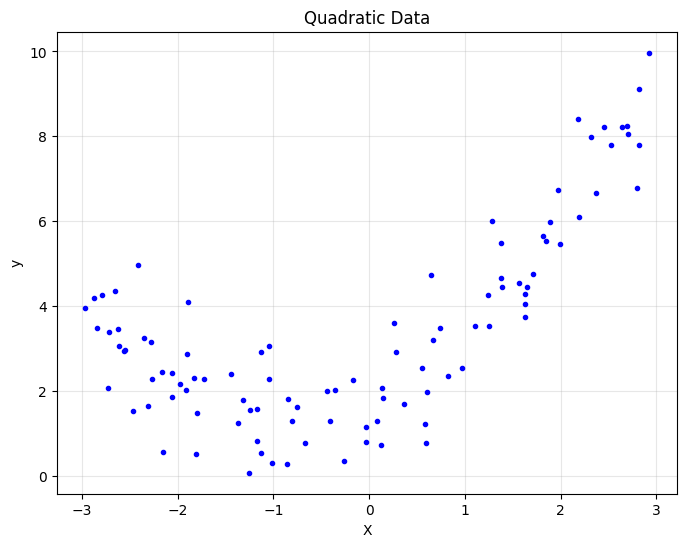

In [15]:
# Generate quadratic data
np.random.seed(42)
m = 100
X_quad = 6 * np.random.rand(m, 1) - 3
y_quad = 0.5 * X_quad**2 + X_quad + 2 + np.random.randn(m, 1)

plt.figure(figsize=(8, 6))
plt.plot(X_quad, y_quad, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Quadratic Data")
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# SVM Regression dengan Polynomial Kernel
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_quad, y_quad.ravel())

print("=== Polynomial Kernel SVR ===")
print("kernel: poly")
print("degree: 2")
print("C: 100 (little regularization)")
print("epsilon: 0.1")

=== Polynomial Kernel SVR ===
kernel: poly
degree: 2
C: 100 (little regularization)
epsilon: 0.1


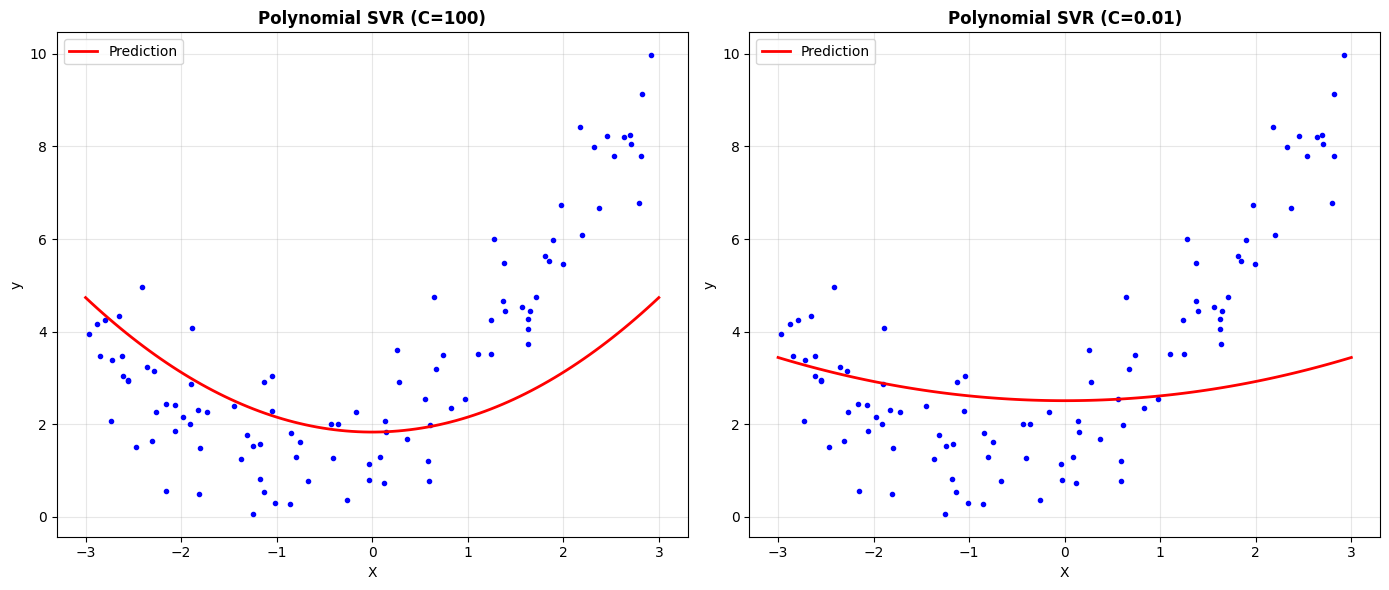


Observasi:
- C=100: Little regularization, fits data closely
- C=0.01: Strong regularization, smoother curve


In [17]:
# Compare C values
C_values = [100, 0.01]
plt.figure(figsize=(14, 6))

for idx, C in enumerate(C_values, 1):
    svm_poly_reg = SVR(kernel="poly", degree=2, C=C, epsilon=0.1)
    svm_poly_reg.fit(X_quad, y_quad.ravel())
    
    X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred = svm_poly_reg.predict(X_new)
    
    plt.subplot(1, 2, idx)
    plt.plot(X_quad, y_quad, "b.")
    plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial SVR (C={C})", fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- C=100: Little regularization, fits data closely")
print("- C=0.01: Strong regularization, smoother curve")

## 6. Under the Hood

### 6.1 Decision Function

Linear SVM classifier predicts class dengan computing:

\\[ w^T x + b \\]

**Prediction rule**:

\\[ \hat{y} = \begin{cases} 0 & \text{if } w^T x + b < 0 \\\\ 1 & \text{if } w^T x + b \geq 0 \end{cases} \\]

### 6.2 Training Objective

**Hard margin SVM**:

\\[ \text{minimize}_{w,b} \frac{1}{2} w^T w \\]
\\[ \text{subject to } t^{(i)}(w^T x^{(i)} + b) \geq 1 \text{ for } i=1,2,...,m \\]

**Soft margin SVM**:

\\[ \text{minimize}_{w,b,\zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{m} \zeta^{(i)} \\]
\\[ \text{subject to } t^{(i)}(w^T x^{(i)} + b) \geq 1 - \zeta^{(i)} \text{ and } \zeta^{(i)} \geq 0 \\]

### 6.3 Kernel Trick

**Key insight**: Kernel function \\( K(a, b) \\) dapat compute dot product \\( \phi(a)^T \phi(b) \\) **tanpa computing transformation \\( \phi \\)**.

Example: \\( K(a, b) = (a^T b)^2 \\) sama dengan dot product dari squared features.

**Mercer's Theorem**: Jika \\( K \\) respects Mercer's conditions, maka exists \\( \phi \\) such that \\( K(a, b) = \phi(a)^T \phi(b) \\).

## 7. Summary & Best Practices

### When to Use SVM:
- Complex small/medium-sized datasets
- When clear margin of separation exists
- High-dimensional spaces
- When memory efficient (uses support vectors only)

### SVM Hyperparameters:

**C (Regularization)**:
- Large C: Less regularization, fewer margin violations
- Small C: More regularization, more margin violations
- If overfitting: REDUCE C

**γ (Gamma for RBF/Polynomial)**:
- Large γ: Narrow influence, irregular boundary
- Small γ: Wide influence, smoother boundary  
- If overfitting: REDUCE γ

**degree (Polynomial)**:
- Higher degree: More complex boundary
- If overfitting: REDUCE degree

**ε (Epsilon for Regression)**:
- Controls width of street
- Larger ε: Wider margin, more instances fit

### Algorithm Selection:

1. **LinearSVC**: Linear classification, large datasets
2. **SVC**: Nonlinear classification, kernel trick
3. **SGDClassifier**: Online learning, huge datasets
4. **LinearSVR**: Linear regression
5. **SVR**: Nonlinear regression, kernel trick

### Important Notes:
- **Always scale features** (StandardScaler)
- **Try linear kernel first** (faster)
- **RBF kernel** works well untuk most cases
- **Use cross-validation** untuk hyperparameter tuning
- SVM **doesn't output probabilities** (unlike Logistic Regression)
- Training time **scales poorly** dengan large datasets (use LinearSVC or SGD)

## Kesimpulan

Chapter 5 memberikan comprehensive understanding tentang Support Vector Machines:

✓ **Linear SVM Classification**: Large margin classification, soft margin

✓ **Nonlinear SVM**: Polynomial features approach

✓ **Kernel Trick**: Mathematical magic untuk efficient nonlinear classification

✓ **Polynomial Kernel**: Untuk polynomial decision boundaries

✓ **Gaussian RBF Kernel**: Most versatile, works well dalam most cases

✓ **SVM Regression**: LinearSVR dan SVR untuk regression tasks

✓ **Computational Complexity**: Trade-offs antara LinearSVC, SVC, dan SGDClassifier

✓ **Under the Hood**: Decision functions, training objectives, kernel trick mathematics

SVM adalah **powerful dan versatile** ML model yang essential dalam ML toolbox. Dengan pemahaman tentang hyperparameters, kernel selection, dan computational trade-offs, dapat effectively apply SVMs untuk berbagai classification dan regression problems.

---
